## Pytorch: the first step

#### Tensor
Tensor 是 PyTorch 的重要数据结构，可以认为是一个高维数组。可以是一个数，一个向量，二维数组（矩阵）以及更高维数组。
Tensor 和 numpy 的 ndarrays 类似，但 tensor 可以用 GPU 加速。  
Tensor 和 numpy 对象共享内存。

In [1]:
from __future__ import print_function
import torch as t
import numpy as np

In [2]:
x = t.rand(5, 3)
x

tensor([[ 0.3026,  0.7303,  0.2506],
        [ 0.1966,  0.9855,  0.2348],
        [ 0.2873,  0.8586,  0.2382],
        [ 0.4649,  0.8338,  0.2562],
        [ 0.8773,  0.7721,  0.9991]])

In [9]:
y = t.rand(5,3)
y

tensor([[ 0.4682,  0.7158,  0.6031],
        [ 0.1859,  0.0121,  0.6442],
        [ 0.2798,  0.1105,  0.8446],
        [ 0.8565,  0.6849,  0.6344],
        [ 0.2049,  0.2588,  0.9860]])

In [4]:
x + y

tensor([[ 1.1845,  1.6431,  0.6547],
        [ 0.7138,  1.5808,  0.7633],
        [ 0.7496,  1.2076,  0.7869],
        [ 1.1829,  1.0215,  0.9940],
        [ 1.7091,  1.4431,  1.4436]])

In [5]:
t.add(x,y)

tensor([[ 1.1845,  1.6431,  0.6547],
        [ 0.7138,  1.5808,  0.7633],
        [ 0.7496,  1.2076,  0.7869],
        [ 1.1829,  1.0215,  0.9940],
        [ 1.7091,  1.4431,  1.4436]])

In [6]:
result = t.Tensor(5,3)
t.add(x,y,out=result)

tensor([[ 1.1845,  1.6431,  0.6547],
        [ 0.7138,  1.5808,  0.7633],
        [ 0.7496,  1.2076,  0.7869],
        [ 1.1829,  1.0215,  0.9940],
        [ 1.7091,  1.4431,  1.4436]])

In [7]:
y.add(x)
print(y)

tensor([[ 0.8819,  0.9128,  0.4041],
        [ 0.5172,  0.5952,  0.5285],
        [ 0.4624,  0.3490,  0.5487],
        [ 0.7180,  0.1878,  0.7378],
        [ 0.8318,  0.6710,  0.4446]])


In [8]:
y.add_(x)
print(y)

tensor([[ 1.1845,  1.6431,  0.6547],
        [ 0.7138,  1.5808,  0.7633],
        [ 0.7496,  1.2076,  0.7869],
        [ 1.1829,  1.0215,  0.9940],
        [ 1.7091,  1.4431,  1.4436]])


In [10]:
x[:,1]

tensor([ 0.7303,  0.9855,  0.8586,  0.8338,  0.7721])

In [11]:
a = t.ones(5)
a

tensor([ 1.,  1.,  1.,  1.,  1.])

In [12]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [13]:
a = np.ones(5)
b = t.from_numpy(a)
print(b)
print(a)

tensor([ 1.,  1.,  1.,  1.,  1.], dtype=torch.float64)
[1. 1. 1. 1. 1.]


In [14]:
b.add_(1)

tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64)

In [15]:
t.cuda.is_available()

True

#### Autograd 自动微分（不需要 Variable）
Tensor 上的所有操作，autograd 都能为它们自动提供微分，避免手动计算导数的过程。  
只要 tensor 的 requires_grad 设置为 True，都可以使用 .backward 进行反向传播，自动计算所有梯度。  
三个属性：
* data：保存 tensor
* grad：保存 tensor 的梯度，grad 是个 Variable，形状和 data 一样
* grad_fn：指向一个 function 对象，用来反向传播计算输入的梯度

In [16]:
x = t.ones((2,2),requires_grad = True)
x

tensor([[ 1.,  1.],
        [ 1.,  1.]])

或者使用 `requires_grad_()` 让 autograd 知道要对 tensor 求导。  
调用 `x.requires_grad` 来查看 x 是否能被求导。

In [39]:
x = t.ones(2,2)
x.requires_grad_()
x.requires_grad

True

In [40]:
y = x.sum()
y

tensor(4.)

In [41]:
y.grad_fn

In [42]:
y.backward()

In [43]:
x.grad

tensor([[ 1.,  1.],
        [ 1.,  1.]])

In [44]:
x.grad.data.zero_()

tensor([[ 0.,  0.],
        [ 0.,  0.]])

#### Neural network 神经网络
Autograd 实现了反向传播，但直接用 autograd 写神经网络还是稍显复杂。torch.nn 是专为神经网络设计的模块化接口。  
nn 构建在 autograd 之上，可用来定义和运行神经网络。  
nn.Module 是其中最重要的类，可把它看成网络的封装，包含网络各层的定义和前向传播方法，调用 forward 方法，可以得到前向传播的结果。  
下面以手写数字识别的 CNN 为例，来看看如何用 nn.Module 实现。

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.conv1 = nn.Conv2d(1,6,5) # channel = 1, filter_number = 6, kernel_size = 5
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        # 这些 function 也可以用层来实现
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要 nn.Module 的子类中定义了 forward 函数，那么 backward 函数就会被自动实现。  
在 forward 函数中可使用 print，log，if，for 循环等 Python 语法，写法和 Python 完全一样。  
通过 net.named_parameters() 得到可学习的参数和名字

In [24]:
for name,param in net.named_parameters():
    print(name,': ',param.size())

conv1.weight :  torch.Size([6, 1, 5, 5])
conv1.bias :  torch.Size([6])
conv2.weight :  torch.Size([16, 6, 5, 5])
conv2.bias :  torch.Size([16])
fc1.weight :  torch.Size([120, 400])
fc1.bias :  torch.Size([120])
fc2.weight :  torch.Size([84, 120])
fc2.bias :  torch.Size([84])
fc3.weight :  torch.Size([10, 84])
fc3.bias :  torch.Size([10])


（**更新：Variable 方法已经废弃**，定义 tensor 时声明 requires_grad = True 即可得到能求导的 Tensor）     
需要注意，torch.nn 不支持一次只输入一个样本，只支持 mini-batches。如果只想输入一个样本，用 x.unsqueeze(0)将 batch_size 设为1.  
比如, nn.Conv2d 的输入必须是4维的，形如 **nsamples\*nchannles\*height\*width**，所以可将 nsamples 设为1

In [46]:
# 弃用 Variable，直接用 torch
x = t.randn((1,1,32,32),requires_grad=True)
out = net(x)
out.size()

torch.Size([1, 10])

#### 损失函数
nn 实现了大多数损失函数，例如 nn.MSELoss, nn.CrossEntropyLoss

In [31]:
output = net(x)
target = t.arange(0,10).reshape(1,10) # 注意要把 target 的尺寸排列成 output 一样
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

tensor(28.6988)

下面我们来观察调用 .backward 后如何自动计算各个参数的梯度

In [32]:
net.zero_grad()
print('反向传播前，conv1.bias 的梯度：')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播后，conv1.bias 的梯度：')
print(net.conv1.bias.grad)

反向传播前，conv1.bias 的梯度：
None
反向传播后，conv1.bias 的梯度：
tensor(1.00000e-02 *
       [ 8.1586,  2.4903,  5.0527, -7.0956,  2.5250,  1.1832])


#### 优化器
反向传播计算完所有参数的梯度后，还需要使用优化算法来更新各个参数。例如随机梯度下降法（SGD）的方法如下：  
> weight = weight - learning_rate\*gradient  

手动实现：  
```python 
learning_rate = 0.01  
for param in net.parameters():  
    param.data.sub_(learning_rate * param.grad.data)  
```
torch.optim 实现了绝大多数优化方法，包括 RMSProp，Adam，SGD 等，更方便使用。

In [47]:
import torch.optim as optim

# 新建优化器，制定要优化的参数和学习率
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# 清零梯度
optimizer.zero_grad()

# 计算损失
output = net(x)
loss = criterion(output,target)

# 反向传播
loss.backward()

# 更新参数，完成训练
optimizer.step()

#### 数据加载和预处理
数据预处理往往繁琐。PyTorch 提供了极大简化数据处理流程的工具。对常用数据集，pytorch 也提供了封装好的接口。  
这些常用数据集保存在 torchvison 中，包括 imagenet，cifar10，mnist 等。同时提供常用的数据转换操作，方便加载数据。

### Cifar-10 分类

步骤：
1. 使用 torchvision 准备 cifar 数据集
2. 定义网络
3. 定义损失函数和优化器
4. 训练网络
5. 测试网络

#### 准备数据集

In [48]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()

In [38]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
    
])

trainset = tv.datasets.CIFAR10(
                        root = '/Users/Yang/Projects/pytorch-examples/',
                        train = True,
                        download = True,
                        transform = transform)

trainloader = t.utils.data.DataLoader(
                            trainset,
                            batch_size = 4,
                            shuffle = True,
                            num_workers = 2)

testset = tv.datasets.CIFAR10(
                        root = '/Users/Yang/Projects/pytorch-examples/',
                        train = False,
                        download = True,
                        transform = transform)

testloader = t.utils.data.DataLoader(
                            testset,
                            batch_size = 4,
                            shuffle = False,
                            num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**Dataset** 是一个数据集，可以按下标访问，返回形如（data，label）的数据。

ship


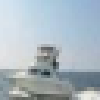

In [39]:
(data, label) = trainset[100]
print(classes[label])
show((data+1)/2).resize((100,100)) # （data+1）/2 是为了还原归一化的数据

**Dataloader** 是一个可迭代的对象，用 iter(dataloader)来迭代，它将 dataset 返回的每一条数据拼接成一个 batch，并且多线程加速优化和数据打乱等操作。  
当程序遍历 dataset 的所有数据之后，**Dataloader** 也完成了一次迭代。

ship        truck       horse       deer        


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x132572470>>
Traceback (most recent call last):
  File "/Users/Yang/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/Users/Yang/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/Users/Yang/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/Users/Yang/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 86, in rebuild_storage_filename
    storage = cls._new_shared_filename(manager, handle, size)
RuntimeError: Interrupted system call at /Users/soumith/minicondabuild3/conda-bld/pytorch_1524590658547/work/torch/lib/libshm/core.cpp:125


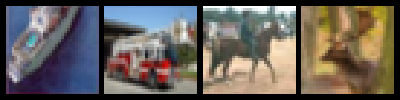

In [50]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(''.join('{:12s}'.format(classes[labels[j]]) for j in range(4)))
show(tv.utils.make_grid((images + 1)/2)).resize((400,100))

#### 定义网络

In [42]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#### 定义损失函数和优化器

In [43]:
from torch import optim

# 损失函数
criterion = nn.CrossEntropyLoss()

# 优化器
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

#### 训练网络
所有网络的训练都类似，不断执行如下步骤：
* 输入数据
* 前向传播+反向传播
* 更新参数

In [83]:
t.set_num_threads(8)

num_epoch = 10

for epoch in range(num_epoch):
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader,0):
        
        images, labels = data
        images, labels = Variable(images), Variable(labels)
        
        # 参数归零
        optimizer.zero_grad()
        
        # 前向+反向
        output = net(images)
        loss = criterion(output, labels)
        loss.backward()
        
        # 更新参数
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if i % 2000 == 1999:
            print('[{:02d},{:05d}] running_loss: {:05f}'.format(epoch + 1,
                                                        i + 1,
                                                        running_loss / 2000))
            running_loss = 0.0

print('Training is completed.')

/Users/Yang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[01,02000] running_loss: 1.993144
[01,04000] running_loss: 1.991228
[01,06000] running_loss: 1.962957
[01,08000] running_loss: 1.965428
[01,10000] running_loss: 1.991568
[01,12000] running_loss: 2.001227
[02,02000] running_loss: 1.965204
[02,04000] running_loss: 1.973732
[02,06000] running_loss: 1.962937
[02,08000] running_loss: 1.973731
[02,10000] running_loss: 1.995240
[02,12000] running_loss: 1.983467
[03,02000] running_loss: 1.962625
[03,04000] running_loss: 1.958908
[03,06000] running_loss: 1.969214
[03,08000] running_loss: 1.959746
[03,10000] running_loss: 2.000824
[03,12000] running_loss: 2.000196
[04,02000] running_loss: 1.940816
[04,04000] running_loss: 1.990356
[04,06000] running_loss: 1.982000
[04,08000] running_loss: 1.987174
[04,10000] running_loss: 1.991394
[04,12000] running_loss: 1.994304
[05,02000] running_loss: 1.972126
[05,04000] running_loss: 1.967053
[05,06000] running_loss: 1.966588
[05,08000] running_loss: 1.972973
[05,10000] running_loss: 1.973499
[05,12000] run

#### 测试网络

correct label:   cat       ship      ship      plane     


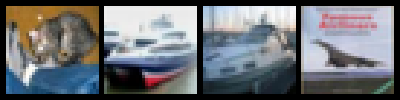

In [84]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('correct label:  ',''.join('{:10s}'.format(classes[labels[j]]) for j in range(4)))
show(tv.utils.make_grid((images + 1)/2)).resize((400,100))


Test result on a batch

In [85]:
output = net(images)
_,predicted = t.max(output.data,1)
print('predicted label: ',''.join('{:10s}'.format(classes[predicted[j]]) for j in range(4)))

predicted label:  cat       ship      ship      ship      


Test result on train dataset

In [86]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    output = net(Variable(images)) # net 只能处理 Variables
    _, predicted = t.max(output.data,1) # 从 ouput 这个 Variable 里提取出 data
    correct += (predicted == labels).sum() 
    # 注意，correct 是个 tensor，稍后用correct.double()转换成数字
    total += labels.size(0)

print('Test accuracy = {:02f}%, total images = {:05d}, epochs = {}'.format(
                                                                    correct.double()/total*100,
                                                                    total,
                                                                    num_epoch))

Test accuracy = 23.430000%, total images = 10000, epochs = 10


#### 总结
1. tensor：类似 numpy 数组的数据结构
2. autograd：tensor 能自动求导
3. nn：专门为神经网络提供的接口，提供神经网络层，优化器，损失函数等
4. 神经网络训练：以 cifar-10为例演示了训练流程，包括数据加载，网络搭建，训练和测试。